# Regression with Keras

March 30, 2022

## Introduction


Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. Building a very complex deep learning network can be achieved with Keras with only few lines of code. In this lab we will use the Keras library to build a regression model.


<h2>Regression Models with Keras</h2>
<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build a regression model.</h5>
<h5> 2. Download and Clean dataset </h5>
<h5> 3. Build a Neural Network </h5>
<h5> 4. Train and Test the Network. </h5>     


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="https://#item31">Download and Clean Dataset</a>
2.  <a href="https://#item32">Import Keras</a>
3.  <a href="https://#item33">Build a Neural Network</a>
4.  <a href="https://#item34">Train and Test the Network</a>

</font>
</div>


<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [20]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
# !pip install keras==2.1.6
# !pip install tensorflow
# !pip install scikit_learn/
# !pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 19.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.5/899.5 KB 18.8 MB/s eta 0:00:0000:01


In [21]:
import pandas as pd
import numpy as np
import keras
# import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Matplotlib is building the font cache; this may take a moment.


We will be playing around with the same dataset that we used in the IBM instructional videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


Let's download the data and read it into a <em>pandas</em> dataframe.


In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa.


### Check data shape

In [3]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [6]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [9]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [184]:
n_cols = predictors_norm.shape[1] # number of predictors
n_cols

8

<a id="item1"></a>


<a id='item32'></a>


## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [302]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(40, activation='relu', input_shape=(n_cols,))) # one hidden layer
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function creates a model that has two hidden layers, each of 50 hidden units.


<a id="item4"></a>


<a id='item34'></a>


## Train and Test the Network


Let's call the function now to create our model.


In [303]:
# build the model
model = regression_model()

Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [304]:
# fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=200, verbose=0)

<strong>You can refer to this [link](https://keras.io/models/sequential/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork20718188-2021-01-01) to learn about other functions that you can use for prediction or evaluation.</strong>


## Visualize model.fit() history

The model.fit() method in Keras returns a History callback object. This object keeps track of the accuracy, loss and other training metrics, for each epoch, in the memory. We can view, summarize, and plot the history like so:

In [305]:
# list all data in history
# print(history.history.keys())

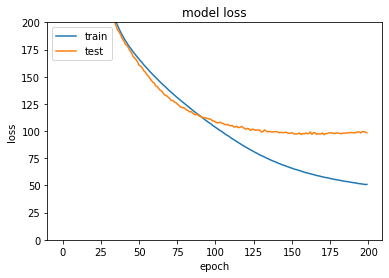

In [306]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 200)
plt.show()

## Evaluate model

In [307]:
estimator = KerasRegressor(build_fn=regression_model, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10)

results = cross_val_score(estimator, predictors_norm, target, cv=kfold)

print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/var/folders/v7/kwt8pd254s312h0tz_xd54j80000gn/T/ipykernel_61574/964868858.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=regression_model, epochs=100, batch_size=5, verbose=0)


Baseline: -58.19 (29.52) MSE


We will manipiulate the following parameters and fit again to evaluate relative performance of these models.

1.  Increase or decrease number of neurons in hidden layers
2.  Add more hidden layers
3.  Increase number of epochs
